In [14]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the Iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
iris_data = pd.read_csv(url, header=None, names=column_names)

# Encode the target variable
le = LabelEncoder()
iris_data['species_encoded'] = le.fit_transform(iris_data['species'])

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X = iris_data.drop(['species', 'species_encoded'], axis=1)  # Features
y = iris_data['species_encoded']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the k-NN classifier (you can choose the value of k)
k = 3  # Example value for k
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Train the classifier on the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display a classification report with precision, recall, and F1-score
report = classification_report(y_test, y_pred, target_names=le.classes_)
print("Classification Report:\n", report)


Accuracy: 1.00
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



C:\Users\harsh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


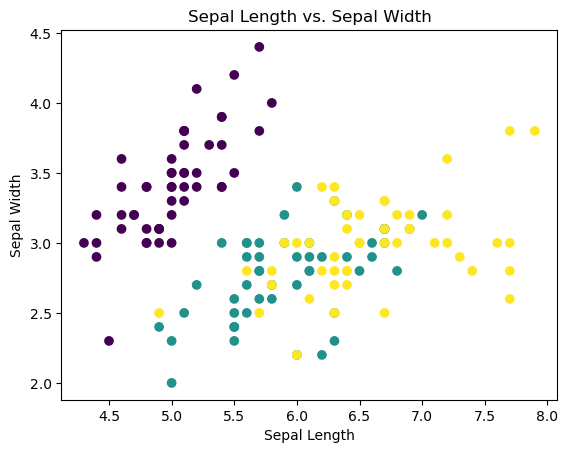

In [15]:
import matplotlib.pyplot as plt

# Scatter plot of sepal length vs. sepal width
plt.scatter(iris_data['sepal_length'], iris_data['sepal_width'], c=iris_data['species_encoded'])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length vs. Sepal Width')
plt.show()


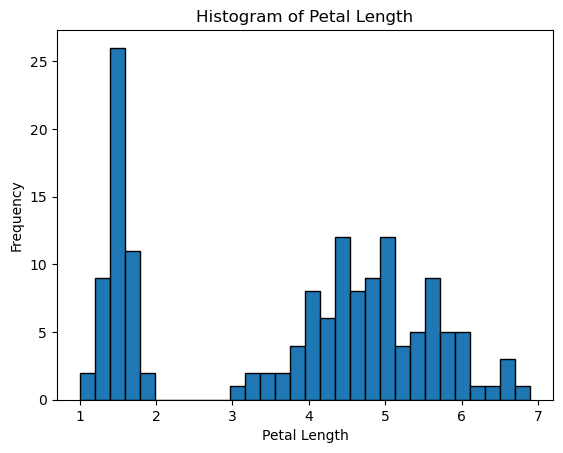

In [16]:
# Histogram of petal length
plt.hist(iris_data['petal_length'], bins=30, edgecolor='k')
plt.xlabel('Petal Length')
plt.ylabel('Frequency')
plt.title('Histogram of Petal Length')
plt.show()


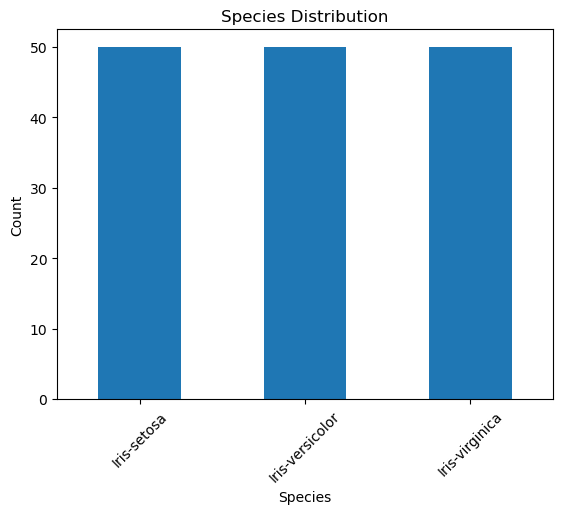

In [17]:
# Bar chart of species counts
species_counts = iris_data['species'].value_counts()
species_counts.plot(kind='bar')
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Species Distribution')
plt.xticks(rotation=45)
plt.show()


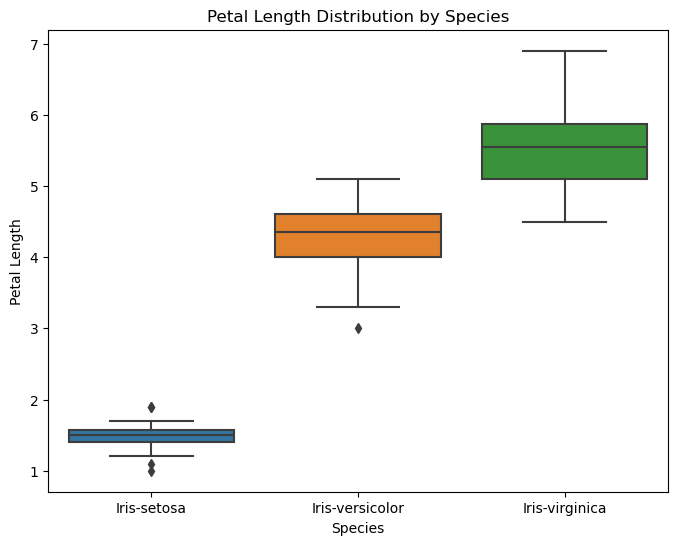

In [18]:
# Box plot of petal length by species
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.boxplot(x='species', y='petal_length', data=iris_data)
plt.xlabel('Species')
plt.ylabel('Petal Length')
plt.title('Petal Length Distribution by Species')
plt.show()


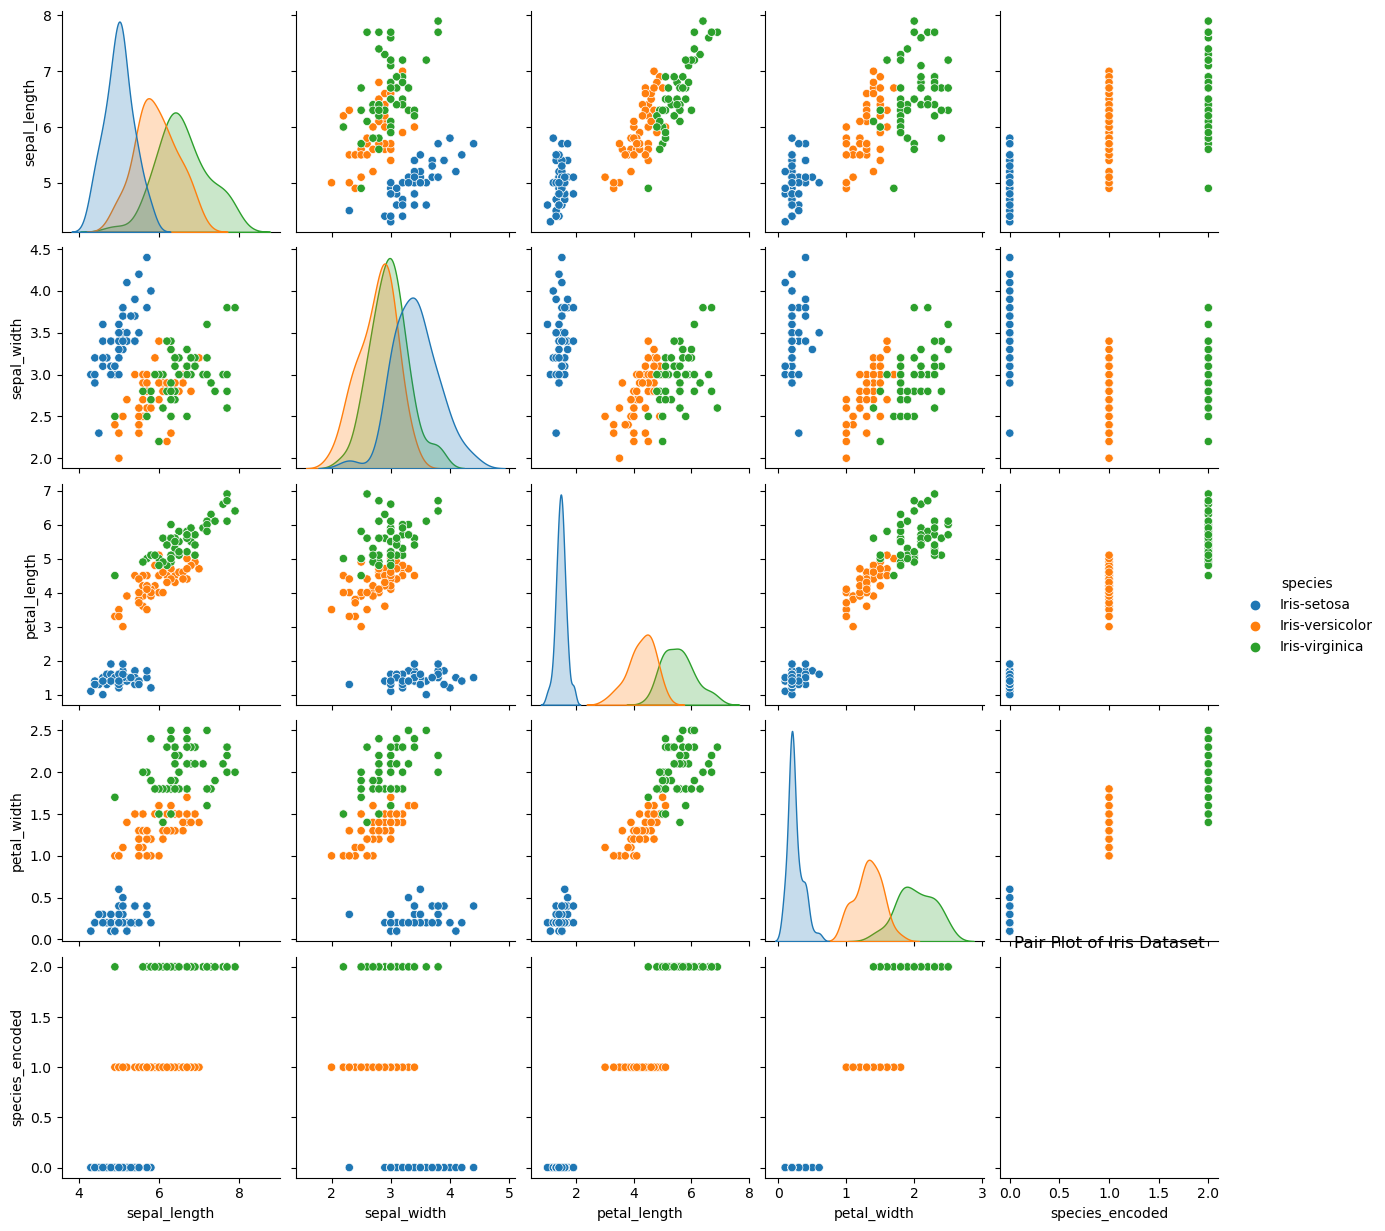

In [19]:
import seaborn as sns

# Pair plot
sns.pairplot(iris_data, hue='species')
plt.title('Pair Plot of Iris Dataset')
plt.show()
